In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'/Users/HP/Desktop/3rd Year Personal/AIML/Datasets/Traffic.csv')
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [3]:
df['Hour']=pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.hour
df.drop('Time', inplace=True, axis=1)
cols=['Traffic Situation', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount']
df.drop(cols, inplace=True, axis=1)

In [4]:
df.head()

,Date,Day of the week,Total,Hour
0,10,Tuesday,39,0
1,10,Tuesday,55,0
2,10,Tuesday,55,0
3,10,Tuesday,58,0
4,10,Tuesday,94,1


In [5]:
day_map={
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6 
}
df["Dayofweek"]=df['Day of the week'].map(day_map)
df.drop('Day of the week', inplace=True, axis=1)

In [8]:
print("Info: \n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Date       2976 non-null   int64
 1   Total      2976 non-null   int64
 2   Hour       2976 non-null   int32
 3   Dayofweek  2976 non-null   int64
dtypes: int32(1), int64(3)
memory usage: 81.5 KB
Info: 
 None


In [ ]:
print("Description: \n", df.describe())

Description: 
               Date        Total        Hour    Dayofweek
count  2976.000000  2976.000000  2976.00000  2976.000000
mean     16.000000   114.218414    11.50000     2.903226
std       8.945775    60.190627     6.92335     1.940643
min       1.000000    21.000000     0.00000     0.000000
25%       8.000000    55.000000     5.75000     1.000000
50%      16.000000   109.000000    11.50000     3.000000
75%      24.000000   164.000000    17.25000     5.000000
max      31.000000   279.000000    23.00000     6.000000


In [10]:
print("Sum of null: ", df.isnull().sum())

Sum of null:  Date         0
Total        0
Hour         0
Dayofweek    0
dtype: int64


Text(0.5, 1.0, 'Feature correlation heatmap')

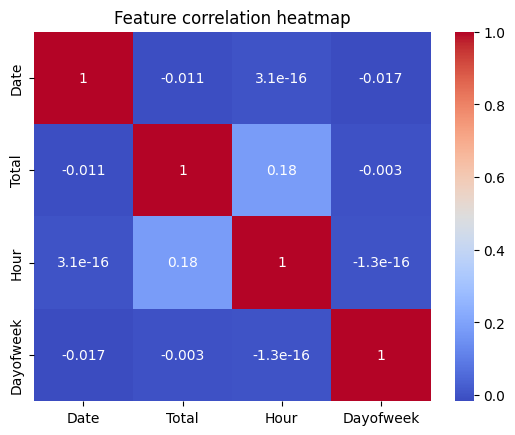

In [11]:
forheatmap=df
df.head()
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature correlation heatmap")

In [ ]:
y=df['Total']
x=df.drop(['Total'], axis=1)

pandas.core.series.Series

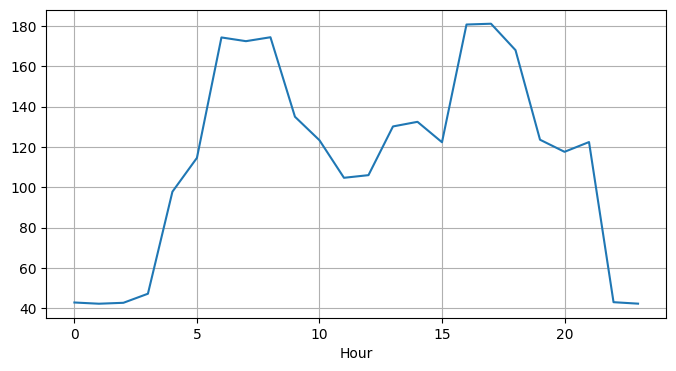

In [15]:
df.groupby('Hour')['Total'].mean().plot(kind='line', figsize=(8, 4))
plt.grid(True)
plt.show()

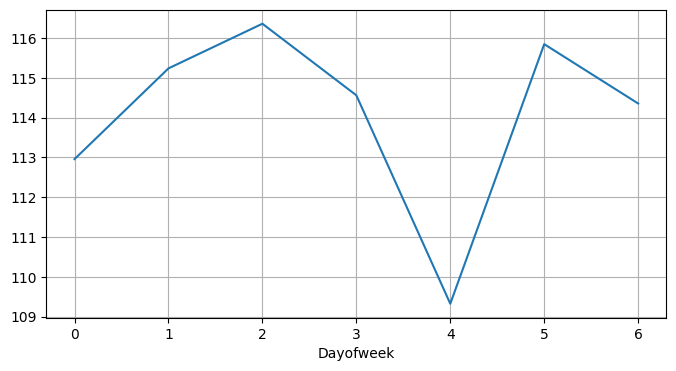

In [16]:
df.groupby('Dayofweek')['Total'].mean().plot(kind='line', figsize=(8, 4))
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Outlier detection')

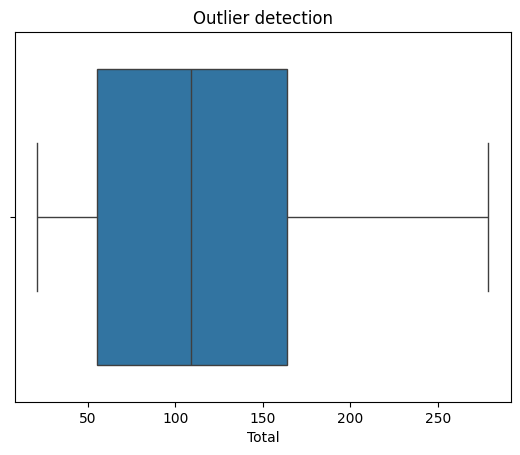

In [ ]:
#Outlier detection
sns.boxplot(x=df['Total'])
plt.title('Outlier detection')

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.2, random_state=0)

In [19]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression 
model1=RandomForestRegressor()
model2=XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.2, random_state=0, objective='reg:squarederror')
model3=LinearRegression()

In [20]:
model1.fit(xtrain, ytrain)
ypred1=model1.predict(xtest)
model2.fit(xtrain, ytrain)
ypred2=model2.predict(xtest)
model3.fit(xtrain, ytrain)
ypred3=model3.predict(xtest)

In [22]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2score1=r2_score(ytest, ypred1)
mae1=mean_absolute_error(ytest, ypred1)
mse1=mean_squared_error(ytest, ypred1)
r2score2=r2_score(ytest, ypred2)
mae2=mean_absolute_error(ytest, ypred2)
mse2=mean_squared_error(ytest, ypred2)
r2score3=r2_score(ytest, ypred3)
mae3=mean_absolute_error(ytest, ypred3)
mse3=mean_squared_error(ytest, ypred3)
scores=[r2score1, mae1, mse1, r2score2, mae2, mse2, r2score3, mae3, mse3]
for i in range(len(scores)):
    print(scores[i], "is the output of ", i)


0.7796252125545795 is the output of  0
20.04541753101485 is the output of  1
796.6376666670775 is the output of  2
0.5862426161766052 is the output of  3
26.267608642578125 is the output of  4
1495.7005615234375 is the output of  5
0.041923127633902824 is the output of  6
50.36487857129307 is the output of  7
3463.3731605002595 is the output of  8
